In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import pandas as pd
import bisect

In [2]:
V_GS = np.arange(-2.5,-4.5,-0.5)
V_GS

array([-2.5, -3. , -3.5, -4. ])

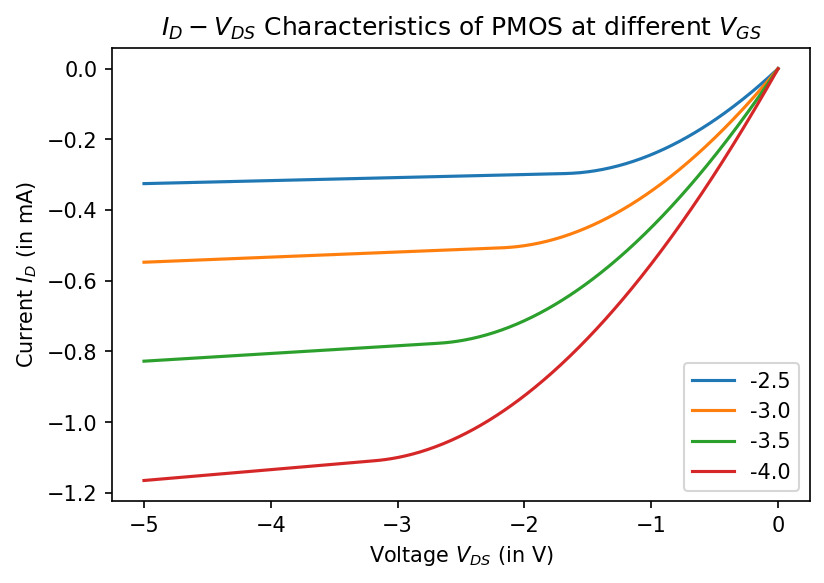

In [3]:
V_DS = []
I_D = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{DS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{DS}$ Characteristics of PMOS at different $V_{GS}$')

for i in range(len(V_GS)):
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab5\\11' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_DS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_DS[i], 1000*I_D[i], '-o', markersize=0.01)
ax1.legend(V_GS)
fig1.set_dpi(150)
fig1.savefig('111.pdf')

In [4]:
slopes = []
for i in range(len(V_GS)):
    slope = []
    for j in range(len(V_DS[i])-1):
        slope.append((I_D[i][j+1]-I_D[i][j])/(V_DS[i][j+1]-V_DS[i][j]))
    slopes.append(slope)
# slopes[0]

In [5]:
slope_min = np.zeros(len(V_GS))
slope_max = np.zeros(len(V_GS))
for i in range(len(V_GS)):
    slope_min[i] = min(slopes[i])
    slope_max[i] = max(slopes[i])
print(slope_min)
print(slope_max)

r_DS = [1/i for i in slope_max]
print("r_DS", r_DS)
r_0= [1/i for i in slope_min]
print("r_0", r_0)

[8.58000e-06 1.44472e-05 2.18344e-05 3.07410e-05]
[0.0003351  0.00043513 0.00053516 0.00063519]
r_DS [2984.1674310586673, 2298.1519312424384, 1868.5908234016658, 1574.3245524630993]
r_0 [116550.11655020829, 69217.56464922901, 45799.2891950539, 32529.846133847495]


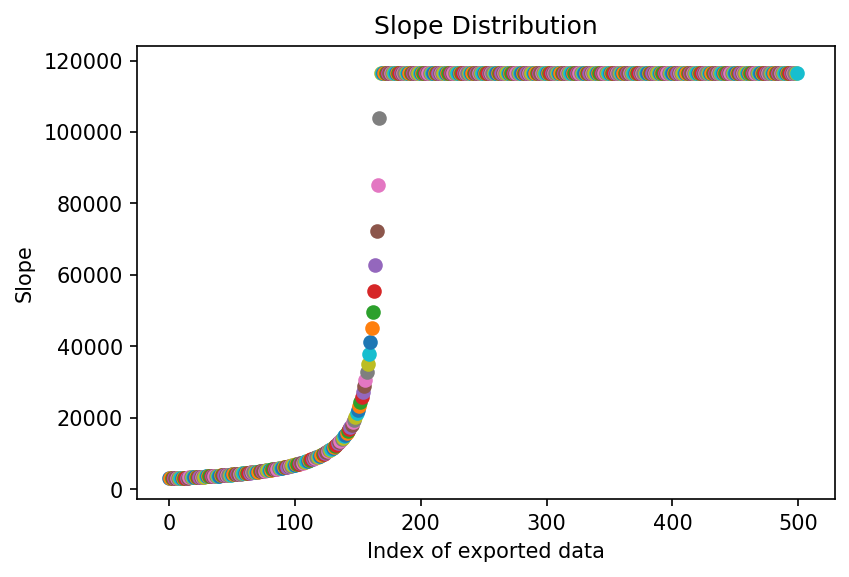

In [6]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Index of exported data')
ax1.set_ylabel('Slope')
ax1.set_title('Slope Distribution')
for i in range(len(V_DS[0])-1):
    plt.scatter(i,(V_DS[0][i+1]-V_DS[0][i])/(I_D[0][i+1]-I_D[0][i]))
fig1.set_dpi(150)
fig1.savefig('121.pdf')

In [7]:
y_intercepts = np.zeros(len(V_GS))
slope_fit = np.zeros(len(V_GS))
for i in range(len(V_GS)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_DS[i][-2:], I_D[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[8.58010e-06 1.44473e-05 2.18345e-05 3.07420e-05]
[-0.00028224 -0.00047524 -0.00071824 -0.00101124]


[30.40001579 30.40000938 30.4000062  30.40034602]
30.40009434592291
[116548.75817293  69217.08554542  45799.0794385   32528.78797734]


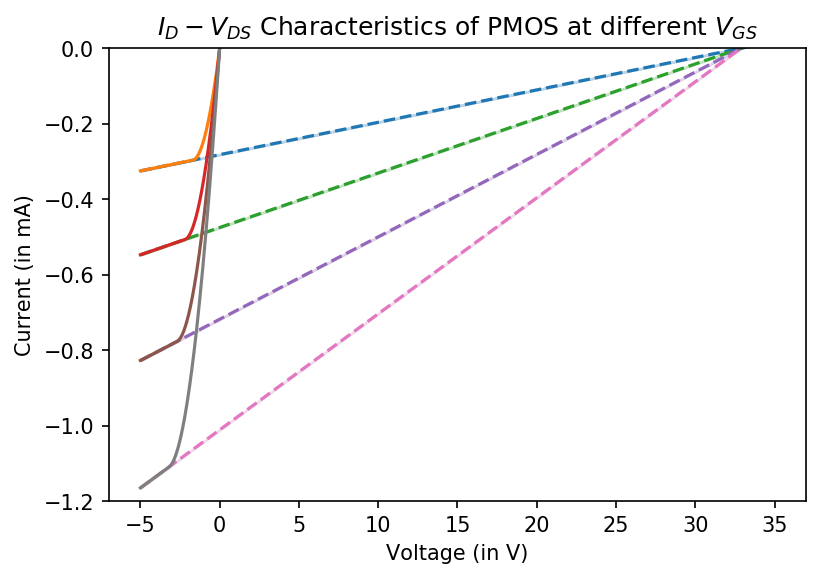

In [8]:
V_A = np.zeros(len(V_GS))
R_0 = np.zeros(len(V_GS))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage (in V)')
ax1.set_ylabel('Current (in mA)')
ax1.set_ylim([-1.2,0])
ax1.set_title('$I_D-V_{DS}$ Characteristics of PMOS at different $V_{GS}$')
fig1.set_dpi(150)
intersect = 35
x = np.arange(-5,intersect,0.01)
for i in range(len(V_GS)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
    ax1.plot(V_DS[i], 1000*I_D[i], '-o', markersize=0.01)
    V_A[i] = -1000*slope_fit[i]/y_intercepts[i]
    R_0[i] = 1/slope_fit[i]
print(V_A)
print(np.mean(V_A))
print(R_0)
fig1.savefig('122.pdf')

-0.037023744000022174
V_T = -0.9200000000004493
g_m = -0.04024320000000445


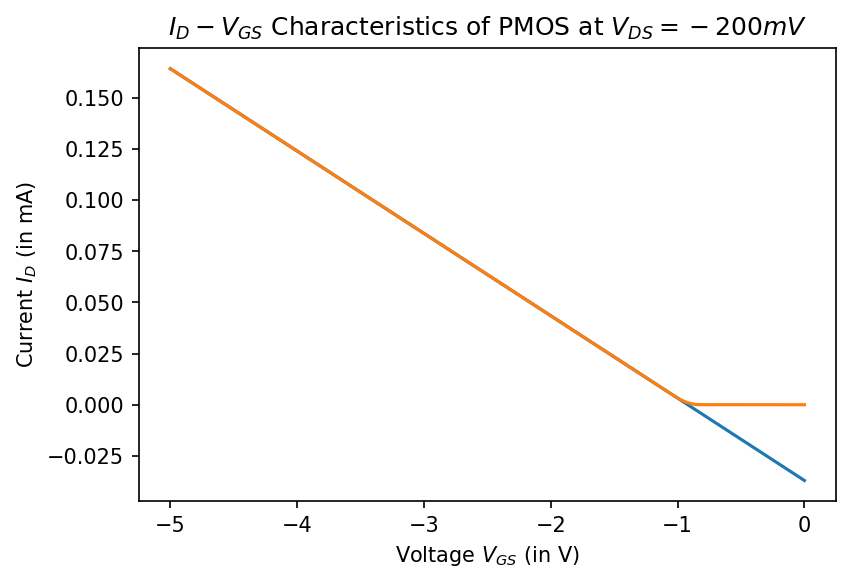

In [9]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab5\\211.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_GS = data[0]
I_D = data[1]

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of PMOS at $V_{DS}=-200mV$')
# ax1.legend(V_GS)
fig1.set_dpi(150)
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[-2:], 1000*I_D[-2:])
ax1.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax1.plot(V_GS, 1000*I_D, '-o', markersize=0.01)
print(y_intercept)
V_T = -y_intercept/slope
print("V_T =", V_T)
g_m = slope
print("g_m =", g_m)  # in m mhos
fig1.savefig('21.pdf')

V_T = -0.8199999792084499
K = 0.2303999988526179
g_m = -0.5034240000000131


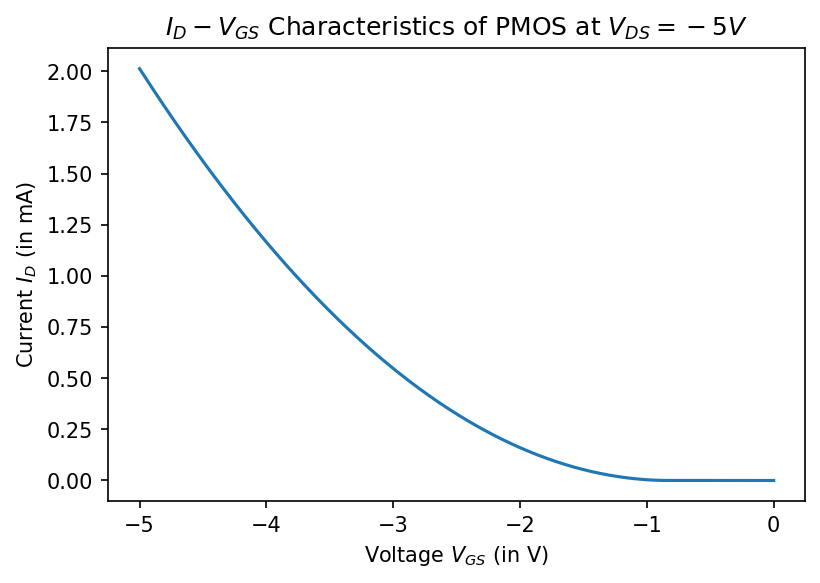

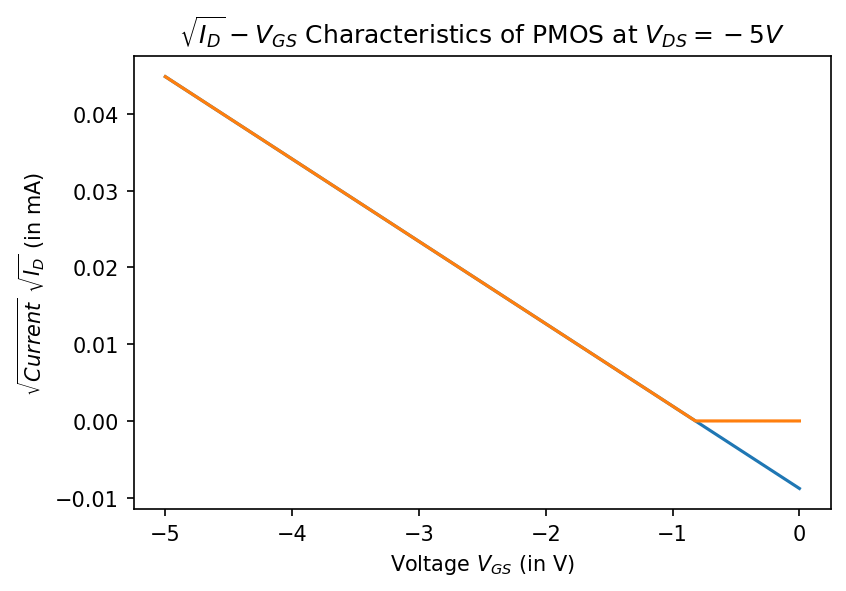

In [10]:
data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab5\\221.txt', header = None, skipinitialspace=True, delim_whitespace=True)
V_GS = data[0]
I_D = data[1]
I_D_sqrt = [math.sqrt(i) for i in I_D]
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of PMOS at $V_{DS}=-5V$')
# ax1.legend(V_GS)
fig1.set_dpi(150)
ax1.plot(V_GS, 1000*I_D, '-o', markersize=0.01)

fig2, ax2 = plt.subplots()
ax2.set_xlabel('Voltage $V_{GS}$ (in V)')
ax2.set_ylabel('$\sqrt{{Current}}$ $\sqrt{I_D}$ (in mA)')
ax2.set_title('$\sqrt{I_D}-V_{GS}$ Characteristics of PMOS at $V_{DS}=-5V$')
slope, y_intercept, r_value, p_value, std_err = stats.linregress(V_GS[-2:], (I_D_sqrt[-2:]))
ax2.plot(V_GS, slope*V_GS + y_intercept, '-o', markersize=0.01)
ax2.plot(V_GS, I_D_sqrt, '-o', markersize=0.01)
fig2.set_dpi(150)
V_T = -y_intercept/slope
print("V_T =", V_T)
K = 1000*2*slope**2
print("K =", K) # mA/V^2
# print(V_GS[300])
g_m = 1000*(I_D[301]-I_D[300]) / (V_GS[301]-V_GS[300])
print("g_m =", g_m)  # in m mhos
fig1.savefig('221.pdf')
fig2.savefig('222.pdf')
# fig2.legend(["Characteristics", "Extrapolation"])

In [11]:
V_SB = np.arange(0,-5,-1)
V_SB

array([ 0, -1, -2, -3, -4])

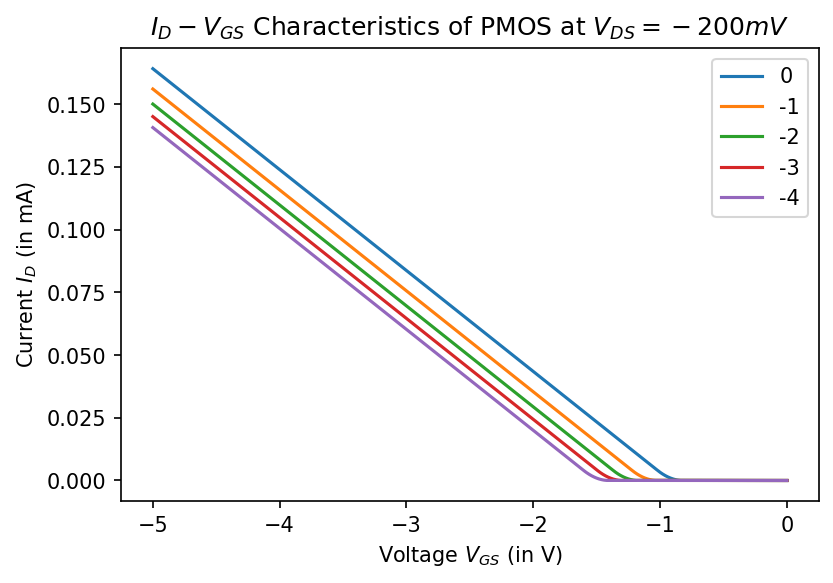

In [12]:
V_GS = []
I_D = []

fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_title('$I_D-V_{GS}$ Characteristics of PMOS at $V_{DS}=-200mV$')

for i in range(len(V_SB)): 
    data = pd.read_csv('E:\Program_Files\Spice64\EE236\Lab5\\31' +  str(i+1) + '.txt', header = None, skipinitialspace=True, delim_whitespace=True)
    V_GS.append(data[0])
    I_D.append(data[1])
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
ax1.legend(V_SB)
fig1.set_dpi(150)
fig1.savefig('311.pdf')

In [13]:
y_intercepts = np.zeros(len(V_SB))
slope_fit = np.zeros(len(V_SB))
for i in range(len(V_SB)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(V_GS[i][-2:], I_D[i][-2:])
    y_intercepts[i] = intercept
    slope_fit[i] = slope
print(slope_fit)
print(y_intercepts)

[-4.02432e-05 -4.02432e-05 -4.02432e-05 -4.02432e-05 -4.02432e-05]
[-3.7023744e-05 -4.5122531e-05 -5.1129055e-05 -5.6127963e-05
 -6.0501959e-05]


[-0.92       -1.1212461  -1.27050172 -1.39471918 -1.50340825]


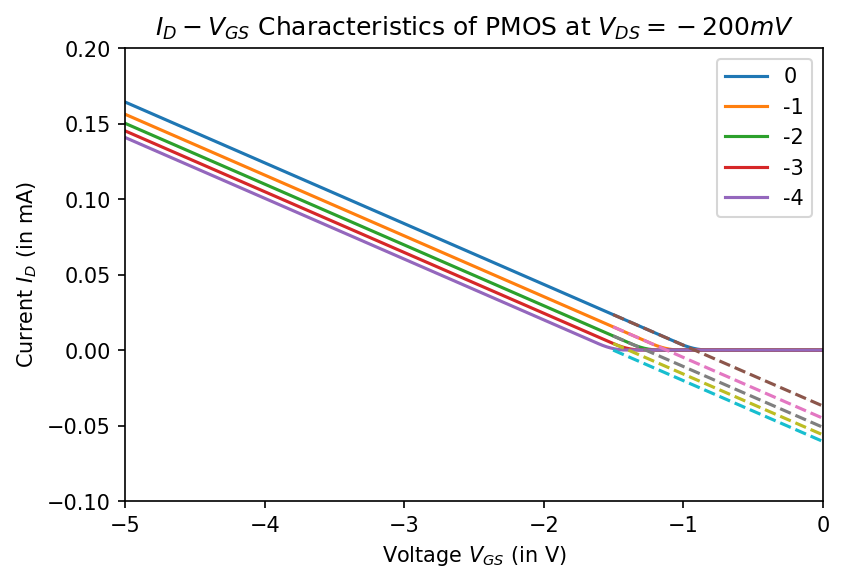

In [14]:
V_T = np.zeros(len(V_SB))
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{GS}$ (in V)')
ax1.set_xlim([-5,0])
ax1.set_ylabel('Current $I_D$ (in mA)')
ax1.set_ylim([-0.1,0.2])
ax1.set_title('$I_D-V_{GS}$ Characteristics of PMOS at $V_{DS}=-200mV$')
fig1.set_dpi(150)
intersect = 10
for i in range(len(V_SB)):
    x = np.arange(-y_intercepts[i]/slope_fit[i],intersect,0.01)
    ax1.plot(V_GS[i], 1000*I_D[i], '-o', markersize=0.01)
    V_T[i] = -y_intercepts[i]/slope_fit[i]
for i in range(len(V_SB)):
    ax1.plot(x, 1000*(slope_fit[i]*x+y_intercepts[i]), '--o', markersize=0.01)
print(V_T)
ax1.legend(V_SB)
fig1.savefig('312.pdf')

In [15]:
gamma = []
phi_s = 0.8
V_T0 = V_T[0]
for i in range(1,len(V_SB)):
    gamma.append((V_T[i] - V_T0)/(math.sqrt(phi_s-V_SB[i]) - math.sqrt(phi_s)))
gamma

[-0.44999995694345235,
 -0.44999991858182586,
 -0.4499999310742659,
 -0.44999991150015334]

In [16]:
gamma_avg = np.mean(gamma)
gamma_avg

-0.4499999295249244

In [17]:
V_Ta = np.zeros(len(V_SB))
for i in range(len(V_SB)):
    V_Ta[i] = V_T0 + gamma_avg*(math.sqrt(phi_s-V_SB[i]) - math.sqrt(phi_s))

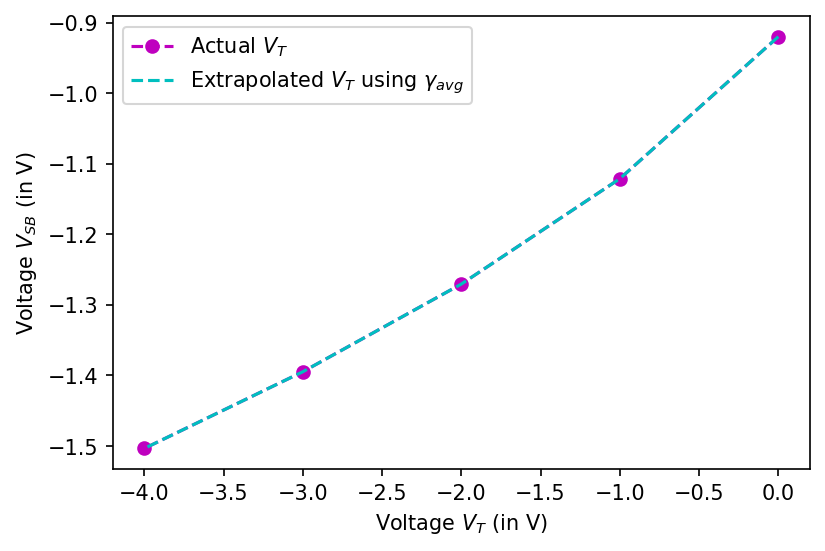

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Voltage $V_{T}$ (in V)')
ax1.set_ylabel('Voltage $V_{SB}$ (in V)')
ax1.plot(V_SB, V_T, '--om')
ax1.plot(V_SB, V_Ta, '--c')
fig1.set_dpi(150)
plt.legend(["Actual $V_T$", "Extrapolated $V_T$ using $\gamma_{avg}$"])
fig1.savefig('32.pdf')